<a href="https://colab.research.google.com/github/aideveloperme/AI-Project/blob/main/Finding_laneLines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Import package**


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


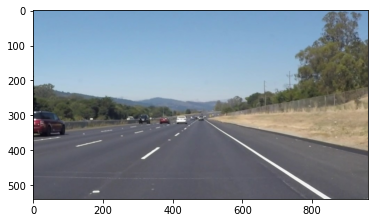

In [ ]:
#reading in an image
image = mpimg.imread('/content/solidWhiteRight.jpg')
lane_image = np.copy(image)

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

**Convert image into grayscale & Apply GaussianBlur**





Edge Detection- identifying sharp chnages in intensity in adjacent pixels


Gradient- Measure of change in brightness over adjacent pixels







gaussian blur


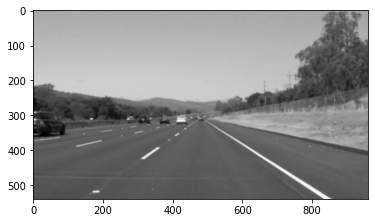

In [ ]:
image = cv2.imread('solidWhiteRight.jpg')
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0) #convolving image with a kernel of gaussian values
print("gaussian blur")
plt.imshow(blur, cmap='gray')
plt.show()

 **Apply Canny method** to identify edges
(To line the strongest gradients)
---
Areas where it's completely black correspond to low chnages in intensity between adjacent pixels.whereas the white line represents a region in the image where there is a high change in intensity, exceeding the threshold






edge detection


<function matplotlib.pyplot.show>

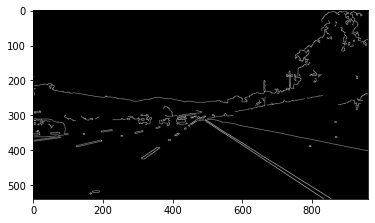

In [ ]:
canny = cv2.Canny(blur, 50, 150) #255 is larger than 150,then it is accepted as an edge pixel and is therefore displayed as an outline of white pixels. if 0 is lower thane 50, then it is rejected
print("edge detection")
plt.imshow(canny, cmap='gray')
plt.show

hough Transfer method - to detect lane


---


1 degree to radians = pi/180

In [ ]:
def make_points(image, line):
    slope, intercept = line
    y1 = int(image.shape[0])# bottom of the image
    y2 = int(y1*3/5)         # slightly lower than the middle
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])
    print(image.shape)

In [ ]:
def average_slope_intercept(image, lines):
    left_fit    = []
    right_fit   = []
    #if lines is None:
     # return None
    len(lines)==0;
    for line in lines:
      for x1, y1, x2, y2 in line:
        fit = np.polyfit((x1,x2), (y1,y2), 1)
        slope = fit[0]
        intercept = fit[1]
        if slope < 0: # y is reversed in image
          left_fit.append((slope, intercept))
        else:
          right_fit.append((slope, intercept))
    # add more weight to longer lines
    left_fit_average  = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)
    left_line  = make_points(image, left_fit_average)
    right_line = make_points(image, right_fit_average)
    averaged_lines = [left_line, right_line]
    return averaged_lines

In [ ]:
def canny(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = 5
    blur = cv2.GaussianBlur(gray,(kernel, kernel),0)
    canny = cv2.Canny(gray, 50, 150)
    return canny


In [ ]:
def display_lines(img, lines):
  line_image = np.zeros_like(img)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line
      cv2.line(line_image,(x1,y1), (x2,y2), (255,0,0), 10)
  return line_image
  plt.imshow(line_image, cmap='gray')
  plt.show()

since the surrounding region is completly black, each pixel with a value of zero .then the binary representation of every pixel intensity in that region would be all zero.as for the polygonal conter, whose region is completely white, then binary representation of every pixel intensity in that region would be all ones.apply this mask to canny image to show the region of interest by applying the bitwise_and operation between the two images.

In [ ]:
def region_of_interest(canny):
  height = canny.shape[0]
  width = canny.shape[1]
  triangle = np.array([
  [(165, height),
  (550, 250),
  (830, height),]], np.int32)
  mask = np.zeros_like(canny)


  masked_image = cv2.fillPoly(mask, triangle, 255)
  masked_image = cv2.bitwise_and(canny, mask) #only show the region everything else will mask
  return masked_image




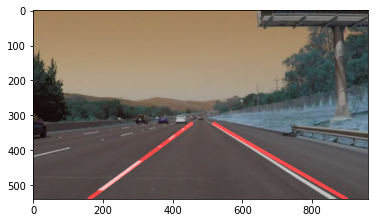

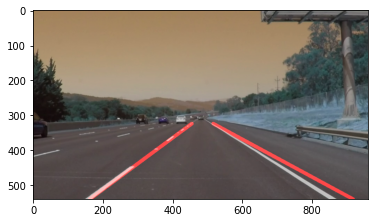

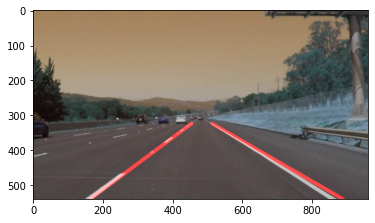

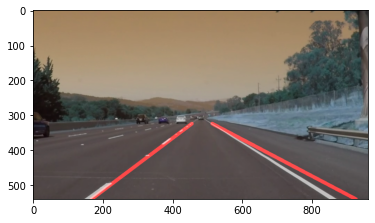

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


TypeError: ignored

In [ ]:
cap = cv2.VideoCapture("/content/solidWhiteRight.mp4")
while(cap.isOpened()):
  _, frame = cap.read()
  canny_image = canny(frame)
  cropped_canny = region_of_interest(canny_image)
  lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
  averaged_lines = average_slope_intercept(frame, lines)
  line_image = display_lines(frame, averaged_lines)
  combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
  plt.imshow(combo_image, cmap='gray')
  plt.show()


In [ ]:
'''image = cv2.imread('/content/solidWhiteRight.jpg')
lane_image = np.copy(image)
lane_canny = canny(lane_image)
cropped_canny = region_of_interest(lane_canny)
lines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)
averaged_lines = average_slope_intercept(image, lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)
plt.imshow(combo_image, cmap='gray')
plt.show()'''

"image = cv2.imread('/content/solidWhiteRight.jpg')\nlane_image = np.copy(image)\nlane_canny = canny(lane_image)\ncropped_canny = region_of_interest(lane_canny)\nlines = cv2.HoughLinesP(cropped_canny, 2, np.pi/180, 100, np.array([]), minLineLength=40,maxLineGap=5)\naveraged_lines = average_slope_intercept(image, lines)\nline_image = display_lines(lane_image, averaged_lines)\ncombo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 0)\nplt.imshow(combo_image, cmap='gray')\nplt.show()"